### Μηχανική Μάθηση 
#### 2η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίηση k-means, καθώς και την μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα. 

Ονοματεπώνυμο φοιτητή: Δρυς-Πεντζάκης Οδυσσεύς

Α.Μ.: 03119192

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα [`salinas_image.npy`](https://drive.google.com/file/d/1NaVn4BpaGmyN3UJOQhTGgMlfznnKhWdD/view?usp=share_link) και τις αντίστοιχες επισημειώσεις [`salinas_labels.npy`](https://drive.google.com/file/d/1u05ZSU8ptz9ZWCi4WuenqG8KuAh981LZ/view?usp=share_link).

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [ ]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt

In [30]:
image=np.load('salinas_image.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά πίξελ εικόνας `salinas_labels.npy`. Οι επισημειώσεις αυτές αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές καλλιέργειες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):
```python
crop_type = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]
```

In [31]:
labels=np.load('salinas_labels.npy')

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων 

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 155ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `crop_type` που σας δόθηκε προηγουμένως.

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [32]:
#2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

height, width, channels = image.shape
print("Height: ", height)
print("Width: ", width)
print("Channels: ", channels)

Height:  512
Width:  217
Channels:  204


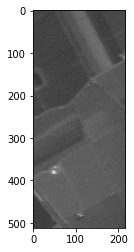

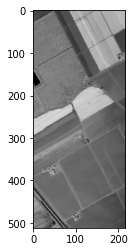

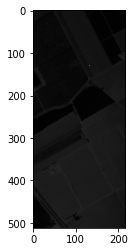

In [33]:
#2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 155ο κανάλι της εικόνας

channel_3 = image[:,:,2]
channel_65 = image[:,:,64]
channel_155 = image[:,:,154]

plt.imshow(channel_3, cmap='gray')
plt.show()
plt.imshow(channel_65, cmap='gray')
plt.show()
plt.imshow(channel_155, cmap='gray')
plt.show()

In [34]:
#2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

num_crop_types = len(np.unique(labels))
print('Number of different crop types:', num_crop_types)

Number of different crop types: 17


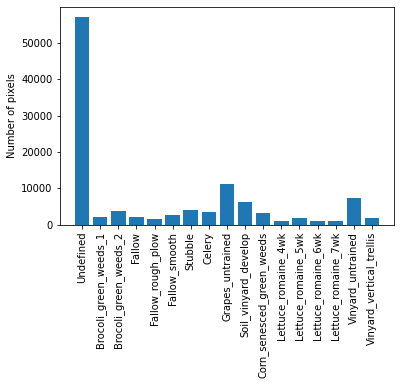

[56975  2009  3726  1976  1394  2678  3959  3579 11271  6203  3278  1068
  1927   916  1070  7268  1807]


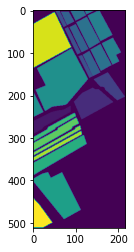

In [56]:
#2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα crop_type που σας δόθηκε προηγουμένως.

# Flatten the labels array
labels_1d = labels.flatten()

# Count the number of pixels with each label
label_counts = np.bincount(labels_1d.astype(int))


crop_types = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]

# Create a bar chart
plt.bar(np.arange(len(label_counts)), label_counts)
plt.xticks(np.arange(len(label_counts)), crop_types, rotation='vertical')
plt.ylabel('Number of pixels')

plt.show()
print(label_counts)

plt.imshow(labels)
plt.show()

In [36]:
#2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

for i, count in enumerate(label_counts):
    print(f'Crop type {i}: {count} pixels')
    

Crop type 0: 56975 pixels
Crop type 1: 2009 pixels
Crop type 2: 3726 pixels
Crop type 3: 1976 pixels
Crop type 4: 1394 pixels
Crop type 5: 2678 pixels
Crop type 6: 3959 pixels
Crop type 7: 3579 pixels
Crop type 8: 11271 pixels
Crop type 9: 6203 pixels
Crop type 10: 3278 pixels
Crop type 11: 1068 pixels
Crop type 12: 1927 pixels
Crop type 13: 916 pixels
Crop type 14: 1070 pixels
Crop type 15: 7268 pixels
Crop type 16: 1807 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, "διώχτε" όσα δεδομένα είναι επισημειωμένα ως `Undefined`. 

💡 Χρησιμοποιήστε την `numpy reshape` 

In [37]:
image_2d = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

# Flatten the labels
labels_1d = labels.flatten()

# Remove "Undefined"
mask = labels_1d != 0
image_2d = image_2d[mask]
labels_1d = labels_1d[mask]
image_2d.size


11042316

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [38]:
# Ρandom pixel from each category

random_pixels = []
for label in np.unique(labels_1d):
    mask = labels_1d == label
    indices = np.flatnonzero(mask)
    random_index = np.random.choice(indices)
    random_pixels.append(image_2d[random_index])



3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων πίξελ. 

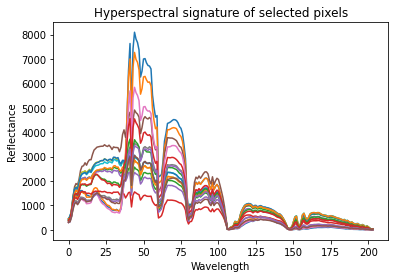

In [39]:
# Plot the hyperspectral signature

for pixel in random_pixels:
    plt.plot(pixel)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Hyperspectral signature of selected pixels')
plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα. 

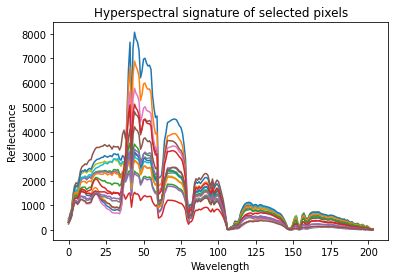

In [40]:
random_pixels = []
for label in np.unique(labels_1d):
    mask = labels_1d == label
    indices = np.flatnonzero(mask)
    random_index = np.random.choice(indices)
    random_pixels.append(image_2d[random_index])
for pixel in random_pixels:
    plt.plot(pixel)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Hyperspectral signature of selected pixels')
plt.show()

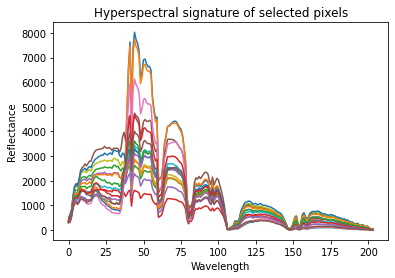

In [41]:
random_pixels = []
for label in np.unique(labels_1d):
    mask = labels_1d == label
    indices = np.flatnonzero(mask)
    random_index = np.random.choice(indices)
    random_pixels.append(image_2d[random_index])
for pixel in random_pixels:
    plt.plot(pixel)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Hyperspectral signature of selected pixels')
plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους; 
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Φαίνεται ότι κάποιες υπογραφές έχουν πολύ μεγαλύτερα μέγιστα από τις άλλες όπως οι 3 που ξεπερνούν τα 5000 στον άξονα y. Παρατηρούμε πως οι συγκεκριμένες διατηρούν την ίδια διαδοχική σειρά μεταξύ τους και στα 3 γραφήματα. Συνεπώς αυτές οι υπογραφές θα είναι εύκολα διαχωρίσιμες με τις άλλες αλλά και μεταξύ τους. Αντίθετα παρατηρούμε κάποια είδη καλλιεργειών που έχουν πολύ παρόμοιες φασματικές γραμμές όπως θα μπορούσε να ήταν αυτές των δύο ειδών μπρόκολου και 3 ειδών fallow. Σε αυτή την περίπτωση οι καλλιέργειες θα είναι δυσκολότερα διαχωρίσιμες.

Βλέπουμε ότι στα κανάλια 25-75 οι φασματικές γραμμές είναι εύκολα διαχωρίσιμες μεταξύ τους συνεπώς εκεί θα έχει μεγάλη πληροφορία. Αντίθετα στο wavelength 100 και μετάα οι υπογραφες μπλέκονται πολύ και είναι σχεδόν αδύνατο να διαχωριστούν. Τελικά η πληροφορία βρίσκεται μόνο στα κανάλια 25-75

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

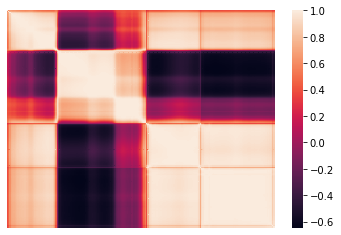

In [42]:
import seaborn as sns

corr_matrix = np.corrcoef(image_2d, rowvar=False)

sns.heatmap(corr_matrix, xticklabels=False, yticklabels=False)

### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [43]:
from sklearn.cluster import KMeans


# KMeans model with n_clusters=16
model = KMeans(n_clusters=16)

# Fit the model 
model.fit(image_2d)
predicted = model.predict(image_2d)
predicted.size

54129

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score 

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχήσουμε τα διαφορετικά ID των cluster στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [44]:
!pip install munkres
from munkres import Munkres
from sklearn.metrics import accuracy_score, rand_score, silhouette_score

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y



from sklearn.metrics import accuracy_score, rand_score, silhouette_score





# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
#Correct Assertion Error in order to use translate_predicted_labels()
labels_reduced = labels_1d-1

In [46]:

# Translate the predicted labels to the corresponding crop type using the function provided above
predicted_labels = translate_predicted_labels(predicted,labels_reduced)

# Calculate the accuracy score
accuracy = accuracy_score(labels_reduced, predicted_labels)
print('Accuracy Score:', accuracy)

# Calculate the rand score
rand = rand_score(labels_1d, predicted)
print('Rand Score:', rand)

# Calculate the silhouette score
silhouette = silhouette_score(image_2d, predicted)
print('Silhouette Score:', silhouette)

map: 0 --> 8
map: 1 --> 10
map: 2 --> 7
map: 3 --> 5
map: 4 --> 0
map: 5 --> 4
map: 6 --> 3
map: 7 --> 15
map: 8 --> 12
map: 9 --> 13
map: 10 --> 14
map: 11 --> 1
map: 12 --> 2
map: 13 --> 9
map: 14 --> 11
map: 15 --> 6
Accuracy Score: 0.6606809658408617
Rand Score: 0.9146653113359599
Silhouette Score: 0.44697939673993176


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχησμένα predicted labels).

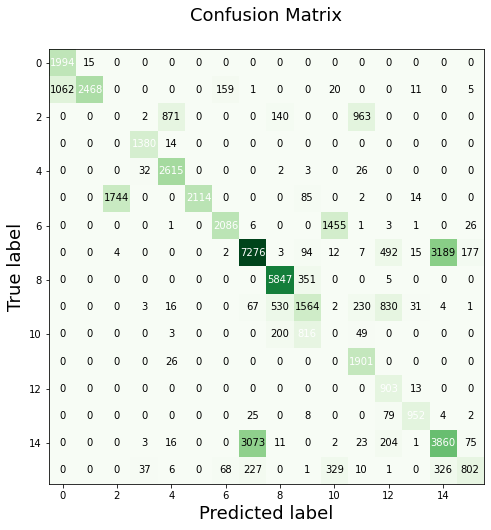

In [47]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
 
confusion_matrix = metrics.confusion_matrix(labels_reduced, predicted_labels) 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix, figsize=(8, 8), cmap=plt.cm.Greens)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [48]:
from sklearn.decomposition import PCA

# PCA model with n_components=3
pca = PCA(n_components=3)


# Transform the data
image_reduced = pca.fit_transform(image_2d)

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [49]:
# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the percentage of explained variance 
retained_variance = 100 * np.sum(explained_variance_ratios)
print('Retained variance:', retained_variance)

Retained variance: 99.46841017129437


### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [50]:
model.fit(image_reduced)

predicted = model.predict(image_reduced)

predicted_labels = translate_predicted_labels(predicted,labels_reduced)

accuracy = accuracy_score(labels_reduced, predicted_labels)
print('Accuracy Score:', accuracy)

rand = rand_score(labels_1d, predicted)
print('Rand Score:', rand)

silhouette = silhouette_score(image_reduced, predicted)
print('Silhouette Score:', silhouette)

map: 0 --> 11
map: 1 --> 0
map: 2 --> 12
map: 3 --> 5
map: 4 --> 2
map: 5 --> 7
map: 6 --> 9
map: 7 --> 3
map: 8 --> 14
map: 9 --> 13
map: 10 --> 6
map: 11 --> 4
map: 12 --> 1
map: 13 --> 15
map: 14 --> 8
map: 15 --> 10
Accuracy Score: 0.645180956603669
Rand Score: 0.9122748286850267
Silhouette Score: 0.4602800102438463


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε; 

In [52]:

n_components = range(1, 11)

# Initialize lists
accuracies = []
rands = []
silhouettes = []


for n in n_components:
    # PCA model with n_components=n
    pca = PCA(n_components=n)
    
    pca.fit(image_2d)
 
    image_reduced = pca.transform(image_2d)

    model = KMeans(n_clusters=16)

    model.fit(image_reduced)
    
    predicted = model.predict(image_reduced)
    
    predicted_labels = translate_predicted_labels(predicted,labels_reduced)

    accuracy = accuracy_score(labels_reduced, predicted_labels)
    accuracies.append(accuracy)

    rand = rand_score(labels_1d, predicted)
    rands.append(rand)

    silhouette = silhouette_score(image_reduced, predicted)
    silhouettes.append(silhouette)



map: 0 --> 7
map: 1 --> 0
map: 2 --> 4
map: 3 --> 13
map: 4 --> 9
map: 5 --> 5
map: 6 --> 6
map: 7 --> 12
map: 8 --> 8
map: 9 --> 10
map: 10 --> 15
map: 11 --> 3
map: 12 --> 2
map: 13 --> 1
map: 14 --> 11
map: 15 --> 14
map: 0 --> 15
map: 1 --> 1
map: 2 --> 8
map: 3 --> 10
map: 4 --> 4
map: 5 --> 9
map: 6 --> 6
map: 7 --> 13
map: 8 --> 0
map: 9 --> 11
map: 10 --> 3
map: 11 --> 5
map: 12 --> 2
map: 13 --> 14
map: 14 --> 7
map: 15 --> 12
map: 0 --> 12
map: 1 --> 1
map: 2 --> 5
map: 3 --> 4
map: 4 --> 2
map: 5 --> 7
map: 6 --> 8
map: 7 --> 14
map: 8 --> 3
map: 9 --> 13
map: 10 --> 6
map: 11 --> 11
map: 12 --> 0
map: 13 --> 9
map: 14 --> 10
map: 15 --> 15
map: 0 --> 14
map: 1 --> 1
map: 2 --> 9
map: 3 --> 5
map: 4 --> 4
map: 5 --> 6
map: 6 --> 11
map: 7 --> 13
map: 8 --> 8
map: 9 --> 3
map: 10 --> 7
map: 11 --> 2
map: 12 --> 0
map: 13 --> 12
map: 14 --> 10
map: 15 --> 15
map: 0 --> 6
map: 1 --> 8
map: 2 --> 14
map: 3 --> 0
map: 4 --> 2
map: 5 --> 15
map: 6 --> 4
map: 7 --> 11
map: 8 --> 9


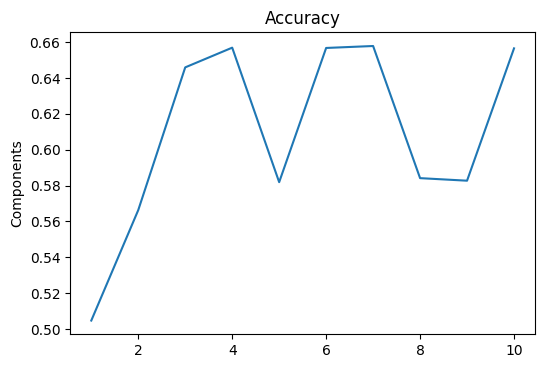

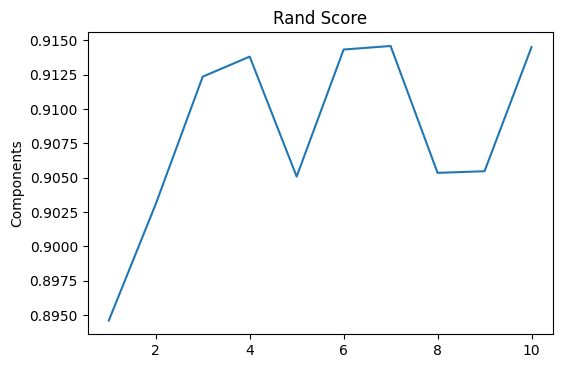

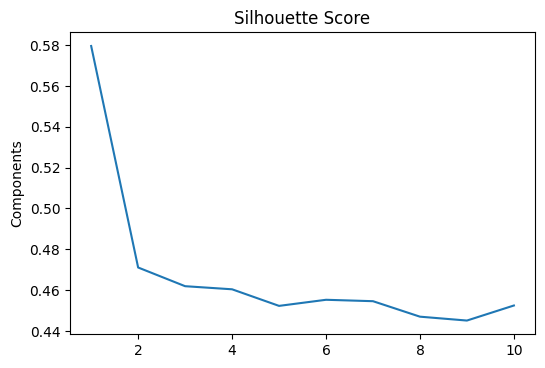

In [54]:

# Plot the scores

x=[i for i in range (1,11)]

plt.figure(dpi=100)
plt.title(f"Accuracy")
plt.ylabel(f"Components")
plt.plot(x, accuracies)

plt.figure(dpi=100)
plt.title(f"Rand Score")
plt.ylabel(f"Components")
plt.plot(x, rands)

plt.figure(dpi=100)
plt.title(f"Silhouette Score")
plt.ylabel(f"Components")
plt.plot(x, silhouettes)

Για το Accuracy Score διακρίνουμε πως γίνεται μέγιστο για 10 components, όμως παρατηρούμε το elbow effect για 6 components, αριθμό που θα προτιμήσοουμε καθώς για 10 components πιθανότατα γίνεται overfitting στα training data.Για το Rand Score παρατηρούμε πως δεν εμφανίζει μεγάλη αυξομείωση όσο αυξάνεται ο αριθμός component, και εμφανίζεται μέγιστο πάλι για 6 components.
Το Accuracy και το Rand Score παρουσιάζουν ίδια μορφή.
Για το Silhouette Score παρατηρούμε πως φθίνει με την αύξηση των components, παρουσιάζοντας μέγιστο για 1 component, όμως για τόσα component τα υπόλοιπα Scores δεν έχουν καθόλου ικανοποιητική τιμή.
Ο λόγος που γίνεται αυτό είναι πως με 1 component τα δεδομένα δεν λαμβάνουν σωστές ετικέτα αλλά διαχωρίζονται καλά.